## Here is the link to the dataset
https://www.kaggle.com/rounakbanik/the-movies-dataset
## This is the pre-cleaned data
https://www.kaggle.com/danofer/movies-data-clean/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
##ratings = pd.read_csv("ratings.csv")
##movies = pd.read_csv("movies_metadata.csv")
cleaned = pd.read_csv("movies_tmdbMeta.csv.gz", low_memory = False)

In [3]:
##ratings = ratings.drop(['userId'], axis=1)
##ratings = ratings.drop(['timestamp'], axis=1)
##ratings = ratings.groupby('movieId').mean().reset_index()
for col in cleaned.columns:
    print(col)

adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count
cast
crew
keywords
weighted_rating
cast_size
crew_size
director
revenue_divide_budget


In [4]:
##movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
##movies['budget'] = movies['budget'].replace(0, np.nan)
##movies['budget']

In [5]:
companies = cleaned['production_companies'].unique()

In [6]:
##le = preprocessing.LabelEncoder()
##le.fit(companies)
##cleaned['production_companies'] = le.transform(cleaned['production_companies'])
cleaned['production_companies'] = pd.get_dummies(cleaned['production_companies'])

In [7]:
##movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
##movies['budget'] = movies['budget'].replace(0, np.nan)
##movies['revenue'] = movies['revenue'].replace(0, np.nan)

revenue = cleaned['revenue']
vote_avg = cleaned['vote_average']
budget = cleaned['budget']
votes = cleaned['vote_count']
movieId = cleaned['id']
popularity = cleaned['popularity']
rating = cleaned['weighted_rating']
production = cleaned['production_companies']
col = ['movieId','budget','revenue','votes','vote_avg','popularity','production_company', 'rating']
data = [movieId, budget, revenue, votes, vote_avg, popularity,production, rating]

df = pd.concat(data, axis=1, keys=col)
##df = df.sort_values(by=['movieID'])

scaler = StandardScaler()



In [8]:
df.dropna(subset=col,inplace=True)


In [9]:
##df.drop_duplicates()


In [10]:
scaler.fit(df.drop('rating', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(df.drop('rating', axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()
df_feat.head(-1)
df_feat['production_company'].mean()

0.0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['rating'],
                                                    test_size=0.2)

In [14]:
y_train = np.array(y_train.astype(int))
y_test = np.array(y_test.astype(int))
fold_error = []
for i in range(1,201):
    knn = KNeighborsClassifier(n_neighbors = i, p =2)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    fold_error.append(np.mean(cross_val_score(knn,X_test,y_test, cv=5)))


C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Trystan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few

In [15]:
fold_error

[0.8407178134382816,
 0.8177726158569885,
 0.8544761315423847,
 0.8452807546992098,
 0.8507942994205553,
 0.8370030391483938,
 0.8397847760100013,
 0.836181625874571,
 0.8371247713667263,
 0.8379833159921356,
 0.8380292885428948,
 0.8343259313050988,
 0.8444265156235378,
 0.8361861615240068,
 0.8398682263782545,
 0.8389801221030104,
 0.8371373415500303,
 0.8316033084777217,
 0.836174167906309,
 0.8288678880000617,
 0.8389767369520676,
 0.8334303664288731,
 0.8325591378866705,
 0.8343604815383271,
 0.829802308659253,
 0.8279382330900047,
 0.8270039287970226,
 0.8233338575604726,
 0.8224164263678121,
 0.8233423522937381,
 0.8252024687791566,
 0.828876382733327,
 0.8261112888723428,
 0.82425570803636,
 0.8197016079746048,
 0.8160195431203571,
 0.8178669756889821,
 0.8169160257626572,
 0.8114193567743531,
 0.8031745833915954,
 0.8059062748851245,
 0.8013524049230678,
 0.8077954881882612,
 0.8041299526011472,
 0.8096262751235436,
 0.8013733534734282,
 0.804133681585278,
 0.8013812716410872,

In [16]:
k_star = np.argmin(fold_error)

knn = KNeighborsClassifier(n_neighbors = k_star, p=2)
knn.fit(X_train, y_train.astype(int))
prediction = knn.predict(X_test)
knn.score(X_test,y_test)*100


82.6923076923077

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

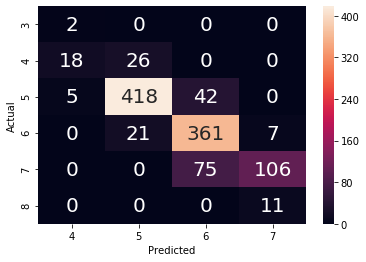

In [18]:
data = {'y_Actual': y_test, 'y_Predicted': prediction}

cd = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(cd['y_Actual'], cd['y_Predicted'], rownames=['Actual'], colnames=['Predicted'] )
akws = {"ha": 'center',"va": 'center',"fontsize":20}
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d',annot_kws=akws)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()